Example of traders standard problem

In [1]:
from Functions_thesis import *
from Functions_plotting import *

#Paramters for config:
T = range(24)
LT=len(T)
eff = 0.9

PW_cap=300 #MWh

SOC_cap = 225 #MWh

P_DIS_CH = 75 #MWh
SOC_init = 0

problem_parameters = {'PW_cap':PW_cap,'SOC_cap':SOC_cap,'P_DIS_CH':P_DIS_CH,'SOC_init':SOC_init,'eff':eff}

n_var=4
n_constraints=10

variables = ['pCH','pDIS','Aux y','SOC']

Target = ['DA_DK2','windpower']

EQUAL = Traders_equality("Equality", T, problem_parameters, n_var, n_constraints,variables,Target)

data, IDS, train_ID, test_ID, features, scaler = load_data('DataV4_shifted.pkl',EQUAL,0.8,problem_parameters,False)

Number of training samples: 790
Number of test samples: 198
PW 1.0
P_DIS_CH 0.25
SOC_init 0.0
SOC_cap 0.75
Efficiency 0.9
Max DA: 871.0


Distribution of targets

Mean of Train Data: 1093.54
Mean of Test Data: 466.05
std of Train Data: 952.49
std of Test Data: 275.73

Median of Train Data: 829.37
Median of Test Data: 468.98
Skewness of Train Data: 1.62
Skewness of Test Data: 0.40



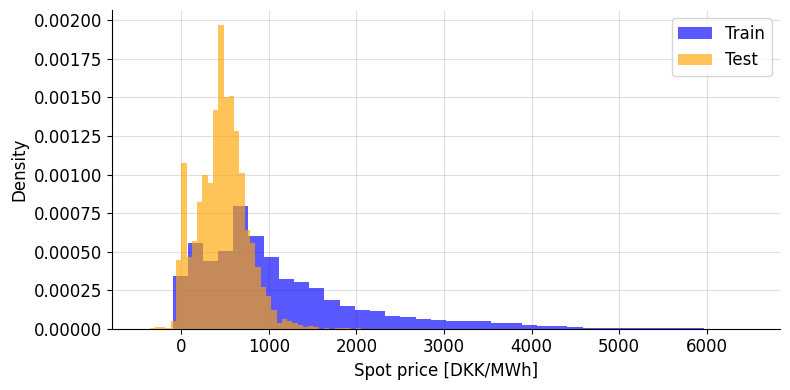

Wasserstein Distance between Training and Testing Sets: 627.50


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance, skew

# Assuming data preparation is done earlier
data['year'] = data.timestamp.dt.year
df_train = data[data['ID'].isin(train_ID)]
df_test = data[data['ID'].isin(test_ID)]

# Variable to plot
var = 'DA_DK2'

# Scaling data based on variable
if var == 'DA_DK2':
    train_data = df_train[var] * EQUAL.DA_scaler
    test_data = df_test[var] * EQUAL.DA_scaler
else:
    train_data = df_train[var] * EQUAL.base_scaler
    test_data = df_test[var] * EQUAL.base_scaler

# Calculate the mean and standard deviation
mean_train = np.mean(train_data)
mean_test = np.mean(test_data)
median_train = np.median(train_data)
median_test = np.median(test_data)
std_train = np.std(train_data)
std_test = np.std(test_data)

print(f"Mean of Train Data: {mean_train:.2f}")
print(f"Mean of Test Data: {mean_test:.2f}")
print(f"std of Train Data: {std_train:.2f}")
print(f"std of Test Data: {std_test:.2f}")

print()
print(f"Median of Train Data: {median_train:.2f}")
print(f"Median of Test Data: {median_test:.2f}")
# Calculate skewness
skew_train = skew(train_data)
skew_test = skew(test_data)

print(f"Skewness of Train Data: {skew_train:.2f}")
print(f"Skewness of Test Data: {skew_test:.2f}")
print()
# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Normalize the histograms to show density
bins = 40
ax.hist(train_data, bins=bins, density=True, alpha=0.65, label='Train', color='blue', zorder=5)
ax.hist(test_data, bins=bins, density=True, alpha=0.65, label='Test', color='orange', zorder=10)
# ax.axvline(mean_train, color='blue', linestyle='dashed', linewidth=2, label=f'Train Mean: {mean_train:.2f}', zorder=15)
# ax.axvline(mean_test, color='orange', linestyle='dashed', linewidth=2, label=f'Test Mean: {mean_test:.2f}', zorder=15)
# ax.axvline(median_train, color='blue', linestyle='-.', linewidth=2, label=f'Train Median: {median_train:.2f}', zorder=15)
# ax.axvline(median_test, color='orange', linestyle='-.', linewidth=2, label=f'Test Median: {median_test:.2f}', zorder=15)

# # Optional: Add skewness lines to the histogram
# ax.axvline(mean_train + skew_train * std_train, color='blue', linestyle='dotted', linewidth=2,
#             label=f'Train Skew: {skew_train:.2f}', zorder=15)
# ax.axvline(mean_test + skew_test * std_test, color='orange', linestyle='dotted', linewidth=2,
#             label=f'Test Skew: {skew_test:.2f}', zorder=15)

# Set x-axis labels based on the variable
if var == "DA_DK2":
    ax.set_xlabel("Spot price [DKK/MWh]")
elif var == "windpower":
    ax.set_xlabel("Wind production [MWh]")
else:
    ax.set_xlabel("Demand [MWh]")

ax.set_ylabel('Density')
ax.legend()

# Add grid lines for better readability
ax.grid(True, which='both', alpha=0.4, zorder=-2)
# ax.tick_params(axis='both', which='major', labelsize=10, length=8)
# ax.tick_params(axis='both', which='minor', labelsize=10, length=5)

# Hide the top and right spines for a cleaner look
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Set a white background
fig.set_facecolor(color='white')

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
fig.savefig(f"Plots/{var}_dist.png", dpi=300, bbox_inches='tight')
# 
# Show the plot
plt.show()

# Calculate Wasserstein distance
distance = wasserstein_distance(train_data, test_data)
print(f"Wasserstein Distance between Training and Testing Sets: {distance:.2f}")


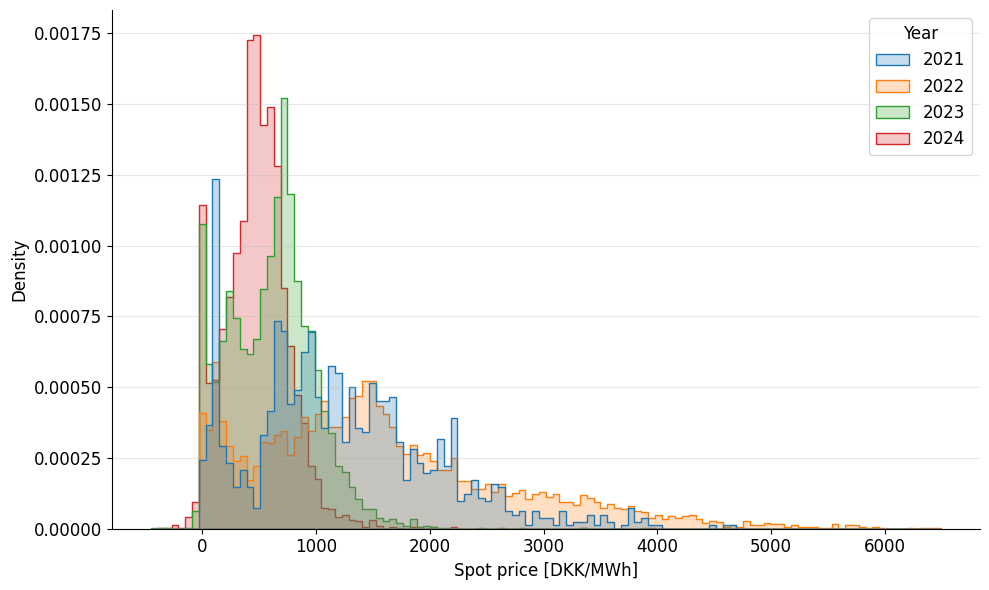

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add the year to the data
data['Year'] = data.timestamp.dt.year
df_train = data[data['ID'].isin(train_ID)]
df_test = data[data['ID'].isin(test_ID)]

var = 'DA_DK2'

# Create scaled data with the year and dataset columns
if var == 'DA_DK2':
    train_data = pd.DataFrame({'value': df_train[var] * EQUAL.DA_scaler, 
                               'Year': df_train['Year'], 'dataset': 'Train'})
    test_data = pd.DataFrame({'value': df_test[var] * EQUAL.DA_scaler, 
                              'Year': df_test['Year'], 'dataset': 'Test'})
else:
    train_data = pd.DataFrame({'value': df_train[var] * EQUAL.base_scaler, 
                               'Year': df_train['Year'], 'dataset': 'Train'})
    test_data = pd.DataFrame({'value': df_test[var] * EQUAL.base_scaler, 
                              'Year': df_test['Year'], 'dataset': 'Test'})

# Combine the two datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Plot with Seaborn, adding hue for the year and styling for the dataset
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(data=combined_data, x='value', hue='Year', element="step", 
             stat="density", common_norm=False, ax=ax,color="black", palette="tab10")

# Set axis labels based on the variable
if var == "DA_DK2":
    plt.xlabel("Spot price [DKK/MWh]")
elif var == "windpower":
    plt.xlabel("Wind production [MWh]")
else:
    plt.xlabel("Demand [MWh]")

plt.ylabel('Density')
# plt.title(f'Density Histogram of {var} by Year')

plt.grid(True, which='both', axis='y', alpha=0.3, zorder=-100)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
fig.set_facecolor('white')
plt.tight_layout()
plt.savefig("Plots\DA_DK2_dist_year.png",dpi=300)
plt.show()

stationarity of data

In [4]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming your data is in a pandas DataFrame called `df` and the column of interest is `your_variable`

def check_stationarity(df, column_name):
    # Perform Augmented Dickey-Fuller test

    if column_name == "DA_DK2":
        df[column_name]=df[column_name]*EQUAL.DA_scaler
    else:
        df[column_name]=df[column_name]*EQUAL.base_scaler
    result = adfuller(df[column_name], autolag='AIC')
    
    # Extract the test results
    adf_statistic = result[0]
    p_value = result[1]
    used_lags = result[2]
    n_obs = result[3]
    critical_values = result[4]
    
    # Print the results
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print(f'Number of lags used: {used_lags}')
    print(f'Number of observations used: {n_obs}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')
    
    # Interpret the p-value
    if p_value < 0.05:
        print("\nConclusion: The series is stationary (reject the null hypothesis).")
    else:
        print("\nConclusion: The series is not stationary (fail to reject the null hypothesis).")

# Example usage:
# Replace 'your_variable' with the column name of the time series you want to test
check_stationarity(df_train, 'P_D')

ADF Statistic: -5.245076224955122
p-value: 7.10819872274947e-06
Number of lags used: 45
Number of observations used: 18914
Critical Values:
   1%: -3.430695785540488
   5%: -2.861692824572659
   10%: -2.5668513444281658

Conclusion: The series is stationary (reject the null hypothesis).


In [33]:
example_df = data.loc['2024-05-05']
DA = example_df['DA_DK2']*EQUAL.DA_scaler
PW = example_df['windpower']*EQUAL.base_scaler

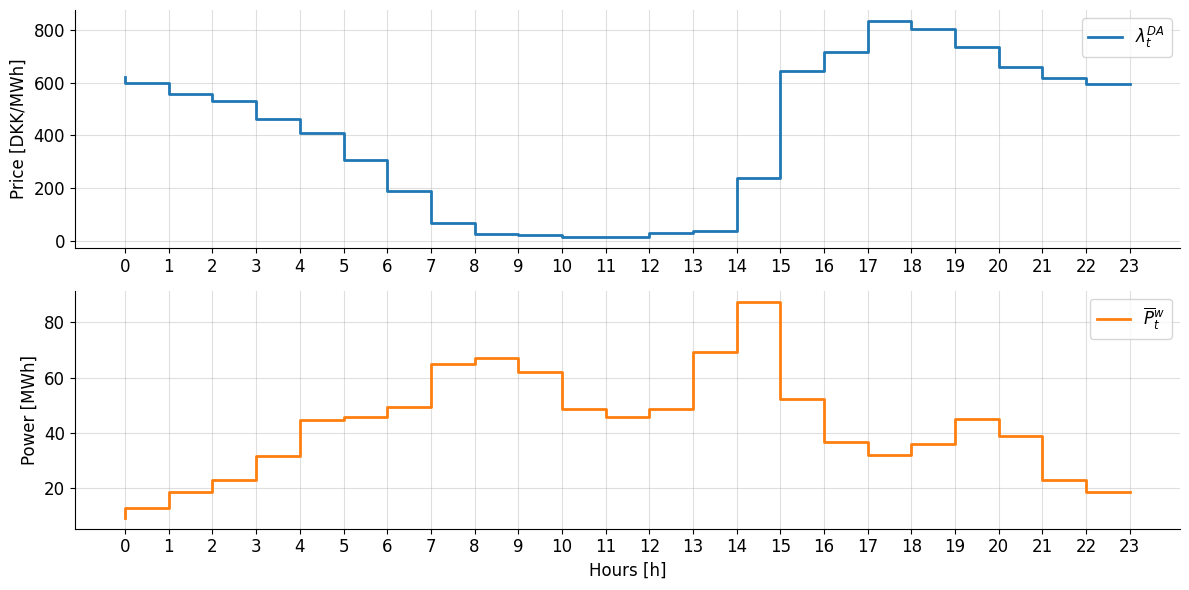

In [34]:
fig, ax = plt.subplots(2,1,figsize=(12,6))

x_values = np.arange(0, 24)

ax[0].step(x_values,DA.values,label="$\\lambda^{DA}_t$",linewidth=2)
ax[0].set_ylabel("Price [DKK/MWh]")
ax[0].grid(alpha=0.4)
ax[0].set_xticks(x_values) 
ax[0].legend(loc='upper right')
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)

ax[1].step(x_values,PW.values,label="$\\overline{P}^{w}_t$",color='C1',linewidth=2)
ax[1].set_ylabel("Power [MWh]")
ax[1].grid(alpha=0.4)
ax[1].set_xlabel("Hours [h]")
ax[1].set_xticks(x_values) 
ax[1].legend()
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

plt.tight_layout()
fig.set_facecolor(color='white')

# plt.savefig("Plots\DA_PW.png",dpi=300)

In [35]:
T = T

# Problem
model = gp.Model("Trader WF BESS")
model.Params.LogToConsole = 0
p_w = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="Wind production")
p_ch = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="BESS charge")
p_dis = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="BESS discharge")
SOC = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="BESS SOC")
# Objective function
model.setObjective(
    (gp.quicksum(DA[t] * (p_w[t] + p_dis[t]) for t in T)), sense=GRB.MAXIMIZE)

# #Capacity constraints:
c1 = model.addConstrs((p_w[t] + p_ch[t] <= PW[t]
                        for t in T), name="Upper wind")
c2 = model.addConstrs(
    (p_ch[t] <= P_DIS_CH for t in T), name="Upper ch")
c3 = model.addConstrs(
    (p_dis[t] <= P_DIS_CH for t in T), name="Upper dis")
c4 = model.addConstr(
    (SOC[0] == SOC_init + eff * p_ch[0] - 1/eff * p_dis[0]), name="SOC 1")
c5 = model.addConstrs((SOC[t] == SOC[t-1] + eff * p_ch[t] -
                        1/eff * p_dis[t] for t in range(1, len(T))), name="SOC t")
c6 = model.addConstrs((SOC[t] <= SOC_cap for t in T), name="Upper SOC")

# Optimize
model.optimize()
if model.status == GRB.OPTIMAL:
    p_w_res = np.array([p_w[t].x for t in T])
    p_ch_res = np.array([p_ch[t].x for t in T])
    p_dis_res = np.array([p_dis[t].x for t in T])
    SOC_res = np.array([SOC[t].x for t in T])
    mu_res = np.array([c1[t].Pi for t in T])
    obj = model.ObjVal
    print(obj)

482289.3862668586


In [36]:
np.sum(p_dis_res*DA)/np.sum((p_w_res+p_dis_res)*DA)*100

33.43166408648369

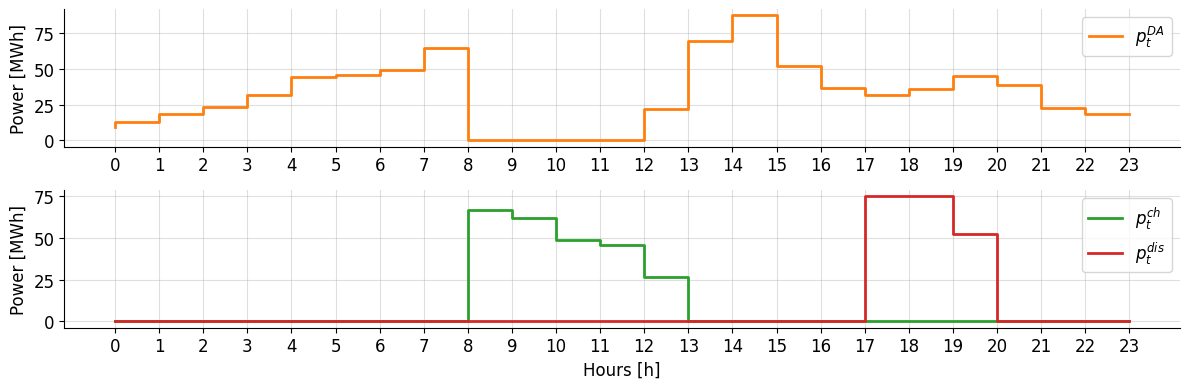

In [37]:
fig, ax = plt.subplots(2,1,figsize=(12,4))

x_values = np.arange(0, 24)

# ax[0].step(x_values,PW,label="$p^{DA}_t$",color="C1",linewidth=3)
ax[0].step(x_values,p_w_res,label="$p^{DA}_t$",color="C1",linewidth=2)
ax[0].set_ylabel("Power [MWh]")
ax[0].grid(alpha=0.4)
ax[0].set_xticks(x_values) 
ax[0].legend()
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)

ax[1].step(x_values,p_ch_res,label="$p^{ch}_t$",color="C2",linewidth=2)
ax[1].step(x_values,p_dis_res,label="$p^{dis}_t$",color="C3",linewidth=2)
ax[1].set_ylabel("Power [MWh]")
ax[1].grid(alpha=0.4)
ax[1].set_xticks(x_values) 
ax[1].legend()
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

ax[-1].set_xlabel("Hours [h]")

plt.tight_layout()
fig.set_facecolor(color='white')

# plt.savefig("Plots\\decisions_sample_trader.png",dpi=300)

In [38]:
T = T
# Problem
model = gp.Model("Trader WF BESS")
model.Params.LogToConsole = 0
p_w = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="Wind production")
p_ch = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="BESS charge")
p_dis = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="BESS discharge")
SOC = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="BESS SOC")
# Objective function
model.setObjective(
    (-gp.quicksum(DA[t] * ((PW[t]-p_ch[t]) + p_dis[t]) for t in T)), sense=GRB.MINIMIZE)

c2 = model.addConstrs(
    (p_ch[t] <= P_DIS_CH for t in T), name="Upper ch")
c3 = model.addConstrs(
    (p_dis[t] <= P_DIS_CH for t in T), name="Upper dis")
c4 = model.addConstr(
    (SOC[0] == SOC_init + eff * p_ch[0] - 1/eff * p_dis[0]), name="SOC 1")
c5 = model.addConstrs((SOC[t] == SOC[t-1] + eff * p_ch[t] -
                        1/eff * p_dis[t] for t in range(1, len(T))), name="SOC t")
c6 = model.addConstrs((SOC[t] <= SOC_cap for t in T), name="Upper SOC")

# Optimize
model.optimize()
if model.status == GRB.OPTIMAL:
    p_w_res = np.array([p_w[t].x for t in T])
    p_ch_res = np.array([p_ch[t].x for t in T])
    p_dis_res = np.array([p_dis[t].x for t in T])
    SOC_res = np.array([SOC[t].x for t in T])
    # mu_res = np.array([c1[t].Pi for t in T])
    obj = model.ObjVal
    print(obj)

-483158.3069696195


Cross validation plot

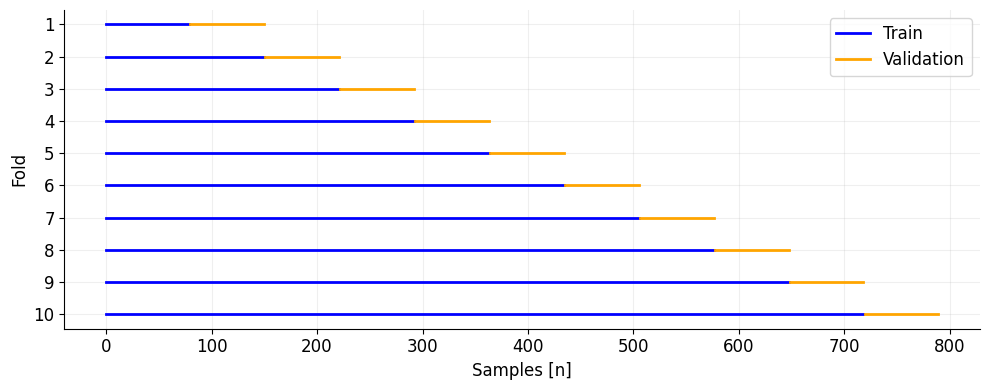

In [20]:
dataset_cv = dataset_creator(
        EQUAL, data, train_ID, features)
# Split train into train and validation data - k-fold timeseries
tscv = TimeSeriesSplit(n_splits=10)

# Dict to save losses and list to save n_samples for each fold
loss_dict = {}
n_samples_fold = []

fig, ax = plt.subplots(figsize=(10, 4))

for fold, (train_idx, val_idx) in enumerate(tscv.split(train_ID)):
    ax.plot(train_idx, [fold] * len(train_idx), color='blue', linewidth=2, label='Train' if fold == 0 else "")
    # Plot the validation indices
    ax.plot(val_idx, [fold] * len(val_idx), color='orange', linewidth=2, label='Validation' if fold == 0 else "")

# Add labels and title
ax.set_xlabel('Samples [n]')
ax.set_ylabel('Fold')
ax.set_yticks(np.arange(0,10),labels=np.arange(1,11))
# Reverse the y-axis
ax.invert_yaxis()

# Add a legend
ax.legend(loc='upper right')

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.grid(alpha=0.2,zorder=-100)
# Show the plot
plt.tight_layout()
fig.set_facecolor(color='white')
plt.savefig("Plots\\cross_validation.png",dpi=300)

# plt.show()
